In [2]:
from google.colab import files
import os
import matplotlib.pyplot as plt

# Upload the file
print("Please upload your file:")
uploaded = files.upload()

# Display the current working directory
print("\nCurrent Working Directory:", os.getcwd())

Please upload your file:


Saving train.csv to train.csv

Current Working Directory: /content


#1. What are your steps in cleaning the dataset? Why did you choose the algorithm that you used in cleaning the dataset?


📌 Preview of the Dataset:

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450 

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


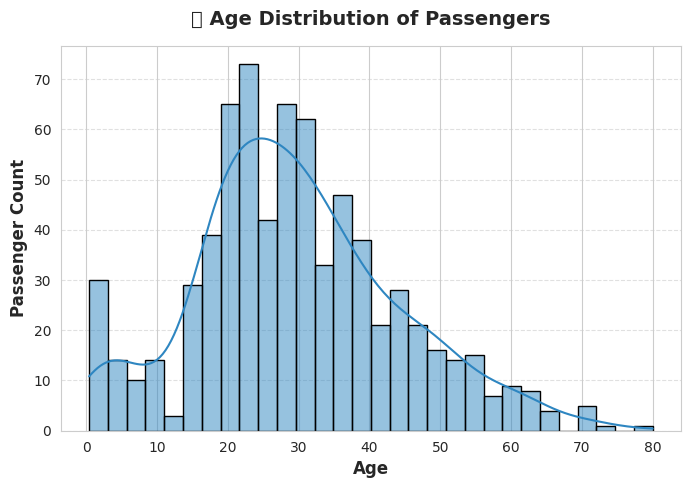

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
df = pd.read_csv("train.csv")

# Display an overview of the dataset
print("\n📌 Preview of the Dataset:\n")
print(df.head())

# Set Seaborn style for a modern look
sns.set_style("whitegrid")

# Plot a histogram of passenger ages
plt.figure(figsize=(8, 5))
sns.histplot(df["Age"].dropna(), bins=30, kde=True, color="#2E86C1", edgecolor="black")

# Customize the plot
plt.xlabel("Age", fontsize=12, fontweight="bold")
plt.ylabel("Passenger Count", fontsize=12, fontweight="bold")
plt.title("📊 Age Distribution of Passengers", fontsize=14, fontweight="bold", pad=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Display the graph
plt.show()


Step 2: Data Cleaning
Handling Missing Values

<ipython-input-4-532b1376bdab>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].median(), inplace=True)  # Fill missing 'age' values with median
<ipython-input-4-532b1376bdab>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[

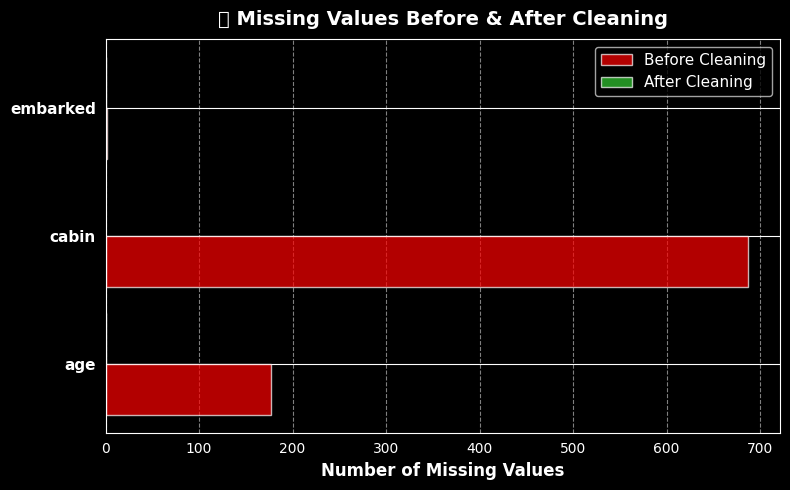

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Apply a dark theme for enhanced contrast
plt.style.use("dark_background")

# Load the dataset
df = pd.read_csv("train.csv")

# Standardize column names (convert to lowercase and remove spaces)
df.columns = df.columns.str.strip().str.lower()

# Preserve the original dataset for comparison
df_original = df.copy()

# 🔹 Data Cleaning Process
df["age"].fillna(df["age"].median(), inplace=True)  # Fill missing 'age' values with median
df.drop(columns=["cabin"], inplace=True)  # Remove 'cabin' due to excessive missing values
df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)  # Fill missing 'embarked' with mode

# Count missing values before and after cleaning
missing_before = df_original.isnull().sum()
missing_after = df.isnull().sum()

# Identify columns that had missing values
missing_summary = pd.DataFrame({"Before Cleaning": missing_before, "After Cleaning": missing_after})
missing_summary = missing_summary[missing_summary["Before Cleaning"] > 0]  # Show only affected columns

# 📊 Visualizing Missing Values (Before vs. After Cleaning)
if not missing_summary.empty:
    fig, ax = plt.subplots(figsize=(8, 5))

    # Bar width and positions
    x = np.arange(len(missing_summary))
    width = 0.4

    # Create side-by-side bar chart
    ax.barh(x - width / 2, missing_summary["Before Cleaning"], height=width, color="red", alpha=0.7, label="Before Cleaning")
    ax.barh(x + width / 2, missing_summary["After Cleaning"], height=width, color="limegreen", alpha=0.7, label="After Cleaning")

    # Customize the plot
    ax.set_yticks(x)
    ax.set_yticklabels(missing_summary.index, fontsize=11, fontweight="bold")
    ax.set_xlabel("Number of Missing Values", fontsize=12, fontweight="bold")
    ax.set_title("📉 Missing Values Before & After Cleaning", fontsize=14, fontweight="bold", pad=10)
    ax.legend(fontsize=11)

    plt.grid(axis="x", linestyle="--", alpha=0.5)  # Add subtle grid lines
    plt.tight_layout()
    plt.show()
else:
    print("\n✅ No missing values detected after cleaning! 🎉")


Removing Duplicates

In [5]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)


Fixing Data Types

In [6]:
# Standardize column names (convert to lowercase and remove spaces)
df.columns = df.columns.str.strip().str.lower()

# Convert 'survived' and 'pclass' to categorical (case-insensitive)
df["survived"] = df["survived"].astype("category")
df["pclass"] = df["pclass"].astype("category")


Standardizing Column Names

In [7]:
# Convert all column names to lowercase
df.columns = df.columns.str.lower()


Step 3: Save Cleaned Dataset

In [8]:
# Save the cleaned dataset
df.to_csv("titanic_cleaned.csv", index=False)

print("Dataset cleaned and saved as titanic_cleaned.csv")


Dataset cleaned and saved as titanic_cleaned.csv


Step 4: Basic Data Analysis
Convert Categorical Columns Back to Numeric for Analysis

In [9]:
# Convert categorical columns back to numeric for analysis
df["survived"] = df["survived"].astype(int)
df["pclass"] = df["pclass"].astype(int)


#2. Create at least two (2) basic data analysis on two (2) columns in the dataset. Be creative and critical in deriving the insights on the data. You can show the visualization used to derive the insights.

<ipython-input-10-1704fe460255>:38: UserWarning: Glyph 128674 (\N{SHIP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128674 (\N{SHIP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


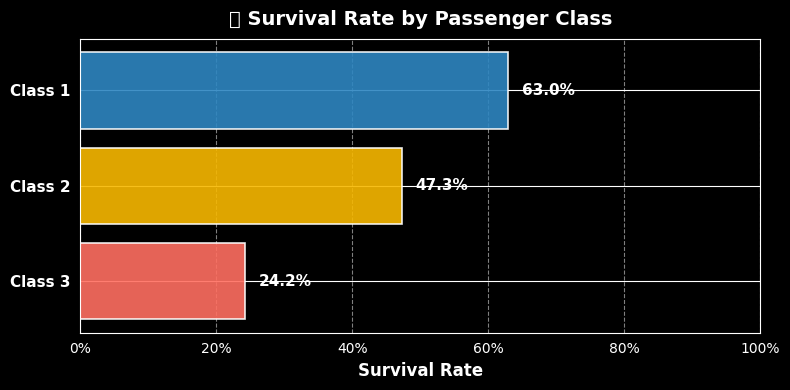

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Apply a dark theme for contrast
plt.style.use("dark_background")

# Define a color palette with a gradient effect
colors = ["#FF6F61", "#F7B801", "#2E86C1"]  # Warm Red, Gold, Deep Blue (for contrast)

# Compute survival rates per class
survival_rates = df.groupby("pclass")["survived"].mean().sort_index(ascending=False)

# Create a figure with a custom size
fig, ax = plt.subplots(figsize=(8, 4))

# Generate a gradient color effect
y_pos = np.arange(len(survival_rates))
bars = ax.barh(y_pos, survival_rates, color=colors, alpha=0.9, edgecolor="white", linewidth=1.2)

# Annotate bars with survival rate percentages
for bar, rate in zip(bars, survival_rates):
    ax.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height()/2, f"{rate:.1%}",
            va="center", ha="left", fontsize=11, fontweight="bold", color="white")

# Labeling
ax.set_yticks(y_pos)
ax.set_yticklabels([f"Class {int(cls)}" for cls in survival_rates.index], fontsize=11, fontweight="bold")
ax.set_xlabel("Survival Rate", fontsize=12, fontweight="bold")
ax.set_title("🚢 Survival Rate by Passenger Class", fontsize=14, fontweight="bold", pad=10)

# Adjust axis limits and grid
ax.set_xlim(0, 1)  # Survival rate ranges from 0 to 1
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0%}"))  # Convert to percentage format
ax.grid(axis="x", linestyle="--", alpha=0.5)

# Improve layout and show the final chart
plt.tight_layout()
plt.show()


<ipython-input-11-516cb70125d4>:47: UserWarning: Glyph 128674 (\N{SHIP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128674 (\N{SHIP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


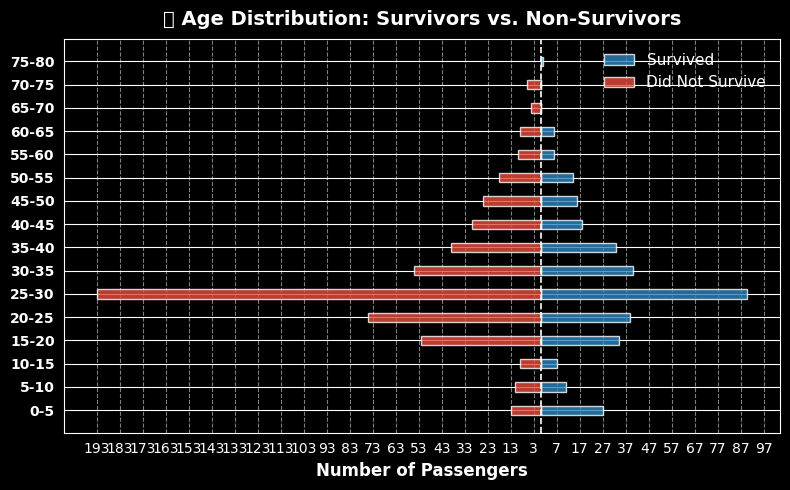

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Apply a dark theme for contrast
plt.style.use("dark_background")

# Define age bins
bins = np.arange(0, 81, 5)  # Age groups (0-5, 5-10, ..., 75-80)
survived_counts, _ = np.histogram(df[df["survived"] == 1]["age"], bins=bins)
not_survived_counts, _ = np.histogram(df[df["survived"] == 0]["age"], bins=bins)

# Define labels for age bins
age_labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins) - 1)]

# Create a figure
fig, ax = plt.subplots(figsize=(8, 5))

# Define bar width
bar_width = 0.4

# Plot survivors and non-survivors using a mirrored horizontal bar chart
y_pos = np.arange(len(age_labels))
ax.barh(y_pos, survived_counts, height=bar_width, color="#2E86C1", alpha=0.8, label="Survived")
ax.barh(y_pos, -not_survived_counts, height=bar_width, color="#E74C3C", alpha=0.8, label="Did Not Survive")

# Labeling
ax.set_yticks(y_pos)
ax.set_yticklabels(age_labels, fontsize=10, fontweight="bold")
ax.set_xlabel("Number of Passengers", fontsize=12, fontweight="bold")
ax.set_title("🚢 Age Distribution: Survivors vs. Non-Survivors", fontsize=14, fontweight="bold", pad=10)

# Flip x-axis labels to show absolute values
ax.set_xticks(np.arange(-max(not_survived_counts), max(survived_counts) + 10, step=10))
ax.set_xticklabels([abs(x) for x in ax.get_xticks()], fontsize=10)

# Add grid lines
ax.grid(axis="x", linestyle="--", alpha=0.5)

# Add a vertical line at zero for clarity
ax.axvline(x=0, color="white", linewidth=1.2, linestyle="--")

# Add legend outside the plot for better clarity
ax.legend(loc="upper right", fontsize=11, frameon=False)

# Adjust layout
plt.tight_layout()
plt.show()
